In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import math
import imp

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [2]:
ALPHABET = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
def revcomp(seq):
    return ''.join(map(lambda x: ALPHABET[x], reversed(seq)))

s = 'GTTGAGGGCCTCTGTCCTGGATGGGGAGATGGTNACTGTGGGNTCCANTCTCCTCTGCNNGATCCCGCGGTACGCCACCTCGTAGTTGTGTCNGCACACTCTNTCCACCGACGCCCGGGCCCCCTCCAGGACTTCCTTCTGGCTGTTCCAGTACTCGGCGCTAGGCCGCCCCTGCGGCGTCACCGCCCGGTACACCCCCACCGCGCTGCCGAAGCGCCCGTGCTCCCCGCGGTGCTGTCTGTGTCTGGGCGCCCCCCGCACGCGCCCCGTACCGGTCGTGAAGGG'
print(revcomp(s))
d = {1:1, 2:2, 3:3}
d
print(dict(filter(lambda x: x[1] > 1, d.items())))
math.ceil(1.1)
5 / 3
a = []
a.extend([])
a.extend([])
a.extend([1])
a.extend([])
a

CCCTTCACGACCGGTACGGGGCGCGTGCGGGGGGCGCCCAGACACAGACAGCACCGCGGGGAGCACGGGCGCTTCGGCAGCGCGGTGGGGGTGTACCGGGCGGTGACGCCGCAGGGGCGGCCTAGCGCCGAGTACTGGAACAGCCAGAAGGAAGTCCTGGAGGGGGCCCGGGCGTCGGTGGANAGAGTGTGCNGACACAACTACGAGGTGGCGTACCGCGGGATCNNGCAGAGGAGANTGGANCCCACAGTNACCATCTCCCCATCCAGGACAGAGGCCCTCAAC
{2: 2, 3: 3}


[1]

In [19]:
import aggregate_sequences
imp.reload(aggregate_sequences)

# F1 = "data/70.__class1_amp1__.R1.fastq"
# seq = aggregate_sequences.aggregate_sequences(F1, max_sequences = 50, q_threshold = 20, seq_threshold = 1)

# Only 2 clusters
F1 = "data/uv.__class1_amp1__.R1.fastq"
# seq = aggregate_sequences.aggregate_sequences(F1, max_sequences = 50, q_threshold = 15, seq_threshold = 2)
# Many clusters
# seq = aggregate_sequences.aggregate_sequences(F1, max_sequences = 50, q_threshold = 5, seq_threshold = 2)

# Exactly six best sequences
#F1 = "data/ash110.__class1_amp1__.R1.fastq"
#seq = aggregate_sequences.aggregate_sequences(F1, max_sequences = 50, q_threshold = 15, seq_threshold = 3)
seq = aggregate_sequences.aggregate_sequences(F1, max_sequences = 50, qpos_threshold = 12, qmed_threshold = 25, seq_threshold = 1)

Searching for unique sequences...
Clustering error sequences...
sum pre filter 5977
sum post filter 5977


KeyboardInterrupt: 

In [62]:
import clusterisation
imp.reload(clusterisation)

F1 = "data/uv.__class1_amp1__.R1.fastq"
#F1 = "data/ash110.__class1_amp1__.R1.fastq"
#F1 = "data/70.__class1_amp1__.R1.fastq"

seq = clusterisation.clusterise_sequences(F1, replace_threshold = 12, low_threshold = 30, high_threshold = 36)

Searching for unique sequences...
Fastq records:	5977
Classes:
	0 seq:	880(0.1476)
	0 rds:	880(0.1472)
	1 seq:	1541(0.2585)
	1 rds:	1541(0.2578)
	2 seq:	3541(0.5939)
	2 rds:	3556(0.5924)

Clustering error sequences...


In [4]:
filename = "tmp.topseq1.txt"
sequences = []
with open(filename) as file:
    sequences = [(x.split()[1], float(x.split()[0])) for x in file]
print(sequences[:5])
print(len(sequences))
print([x[1] for x in sequences])
print([x[0].count('N') for x in sequences])

[('GGCTGGCTCCCACTCCATGAGGTATTTCCACACCTCCGTGTCCCGGCCCGGCCGCGGGGAGCCCCGCTTCATCACCGTGGGCTACGTGGACGACACGCTGTTCGTGAGGTTCGACAGCGACGCCGCGAGTCCGAGAGAGGAGCCGCGGGCGCCGTGGATAGAGCAGGAGGGGCCGGAGTATTGGGACCGGGAGACACAGATCTGCAAGGCCAAGGCACAGACTGACCGAGAGGACCTGCGGACCCTGCTCCGCTACTACAACCAGAGCGAGGCCGGGTCTCACAC', 3389.4363256180463), ('GGCCGGCTCCCACTCCATGAGGTATTTCTACACCGCCATGTCCCGGCCCGGCCGCGGGGAGCCCCGCTTCATCGCAGTGGGCTACGTGGACGACACCCAGTTCGTGAGGTTCGACAGCGACGCCGCGAGTCCGAGGACGGAGCCCCGGGCGCCATGGATAGAGCAGGAGGGGCCGGAGTATTGGGACCGGAACACACAGATCTTCAAGACCAACACACAGACTTACCGAGAGAGCCTGCGGAACCTGCGCGGCTACTACAACCAGAGCGAGGCCGGGTCTCACAT', 462.8586595075123), ('GGCAGGCTCCCACTCCATGAGGTATTTCTCCACATCCGTGTCCCGGCCCGGCCGCGGGGAGCCCCGCTTCATCGCCGTGGGCTACGTGGACGACACGCAGTTCGTGCGGTTCGACAGCGACGCCGCGAGCCAGAGGATGGAGCCGCGGGCGCCGTGGATAGAGCAGGAGGGGCCGGAGTATTGGGACGAGGAGACAGGGAAAGTGAAGGCCCACTCACAGACTGACCGAGAGAACCTGCGGATCGCGCTCCGCTACTACAACCAGAGCGAGGCCGGTTCTCACAC', 276.6002171334388), ('GGCGGGCTCCCACTCCATGAGGTATTTCTACACCTCCGTGTCCCGGCCCGGCCGCGGGGAGCCCCG

50
55


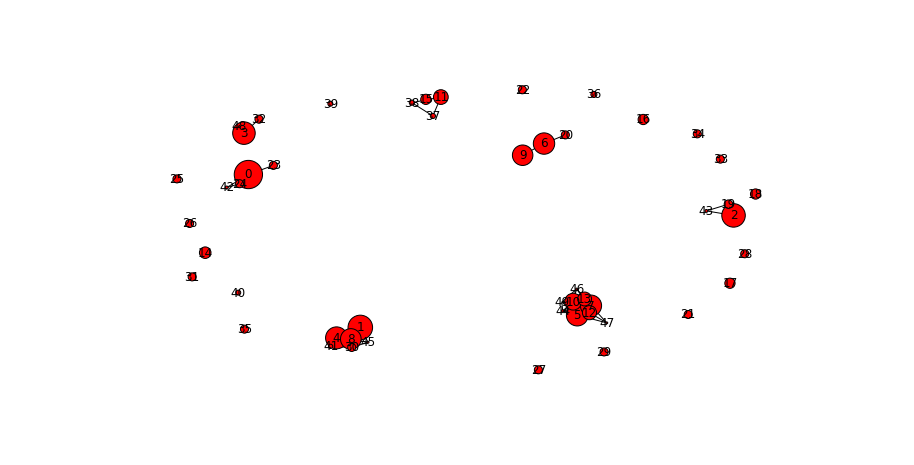

In [18]:
MAX_ERR = 10

def hamming_check(alpha, beta, max_err = MAX_ERR):
	if len(alpha) != len(beta): 
		print("!!!!")
	err = 0
	for a, b in zip(alpha, beta):
		err += (a != b) and (a != 'N') and (b != 'N')
		if err > max_err:
			return False
	return True


def make_graph(sequences):
    G=nx.Graph()
    for i in range(len(sequences)):
        G.add_node(i)
    for i in range(len(sequences) - 1):
        for j in range(i + 1, len(sequences)):
            if hamming_check(sequences[i][0], sequences[j][0]):
                G.add_edge(i, j)
    return G;


node_sizes = [math.log2(x[1]) for x in sequences]
node_sizes_min = min(node_sizes)
node_sizes_max = max(node_sizes)
for i in range(len(node_sizes)):
    node_sizes[i] = 800 * (node_sizes[i] - node_sizes_min) / (node_sizes_max - node_sizes_min)

G = make_graph(sequences)
print(G.number_of_nodes())
print(G.number_of_edges())
pos = nx.spring_layout(G, k = .25)
nx.draw(G, pos, node_size = node_sizes)
nx.draw_networkx_labels(G, pos)
plt.show()

1: [(0, 0.6664, 3389.4363256180463)]
2: [(1, 0.0922, 462.8586595075123), (4, 0.0294, 135.32015218969684), (8, 0.0185, 78.48593425697115)]
3: [(2, 0.0544, 276.6002171334388)]
4: [(3, 0.0347, 176.4857818770939)]
5: [(5, 0.0247, 125.04822901877915), (12, 0.0028, 7.817465490899295)]
6: [(6, 0.0214, 104.94568362906611), (9, 0.0152, 72.0543163709339)]
7: [(7, 0.019, 96.24564675882758), (10, 0.0046, 17.966219283396146), (13, 0.0015, 7.2491457301344475), (49, 0.0003, 1.037256891116902)]
8: [(11, 0.0018, 9.274999999999999), (38, 0.0004, 1.3625), (37, 0.0003, 1.3625)]
9: [(14, 0.0008, 4.0)]
10: [(15, 0.0006, 3.0)]
11: [(16, 0.0006, 3.0)]
12: [(17, 0.0006, 3.0)]
13: [(18, 0.0006, 3.0)]
14: [(19, 0.0004, 2.175283610101629)]
15: [(20, 0.0004, 2.0)]
16: [(21, 0.0004, 2.0)]
17: [(22, 0.0004, 2.0)]
18: [(23, 0.0004, 2.0)]
19: [(24, 0.0004, 2.0)]
20: [(25, 0.0004, 2.0)]
21: [(26, 0.0004, 2.0)]
22: [(27, 0.0004, 2.0)]
23: [(28, 0.0004, 2.0)]
24: [(29, 0.0004, 2.0)]
25: [(30, 0.0004, 2.0)]
26: [(31, 0.00

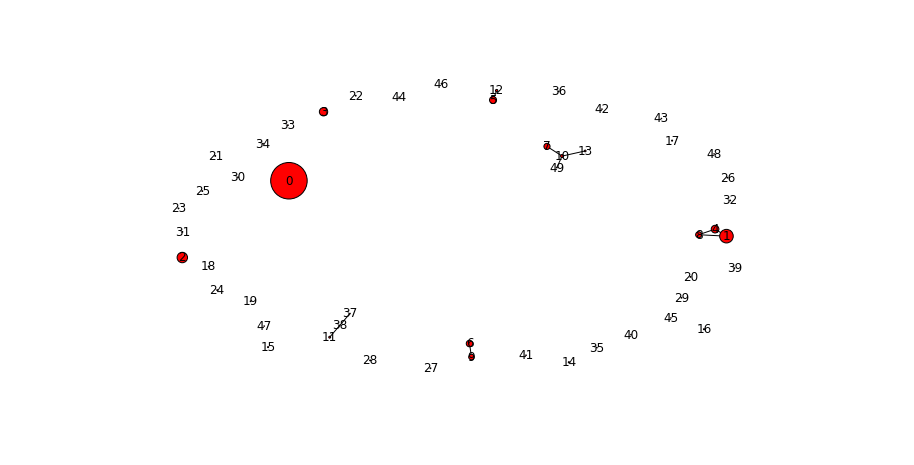

In [6]:
pr = nx.pagerank_numpy(G, alpha = .05, personalization = {i: sequences[i][1] for i in range(len(sequences))})
for i, x in enumerate(nx.connected_components(G)):
    print(i+1, ": ", sorted(list(zip(x, [round(pr[y], 4) for y in x], [sequences[y][1] for y in x])), key = lambda x: x[1], reverse = True), sep = '')
pos = nx.spring_layout(G, k = .2)
nx.draw(G, pos, node_size = [2000 * x[1] for x in pr.items()])
nx.draw_networkx_labels(G, pos)
plt.show()